<h1 style="color: blue; font-family: Algerian; font-weight: bold;">ATTRITION ANALYSIS 💼📉</h1>

* In this dataset, we are going to understand and tackle employee turnover.Uncover the factors that lead to employee attrition. We are going to explore the questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.
* We will be looking at things like job happiness and career growth and many more factors, we'll dig into what makes people stay or go.
* Data technologies like MachinG Learning will be ver helpful to tell whether a particular person with the certain status will will stay in the comapy not not.

<h2 style="color: orange; font-family: Helvetica; font-weight: bold;">EXPLORATORY DATA ANALYSIS</h2>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
df = pd.read_csv("D:\\My_Study\\Data Analytics\\Excel Data Sets\\DataSets 2\\ATTRITION.csv")

In [4]:
df.head(10)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,Single,1420,Upto 5k,25233,1,Y,No,13,3,3
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,Single,1200,Upto 5k,9724,1,Y,No,12,3,1
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,Single,1051,Upto 5k,13493,1,Y,No,15,3,4
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,Single,1904,Upto 5k,13556,1,Y,No,12,3,4
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,Single,1611,Upto 5k,19305,1,Y,No,15,3,3
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,Single,1569,Upto 5k,18420,1,Y,Yes,12,3,3
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,Single,1514,Upto 5k,8018,1,Y,No,16,3,3
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,Single,1675,Upto 5k,26820,1,Y,Yes,19,3,4
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,Single,1483,Upto 5k,16102,1,Y,No,14,3,4


There can be many factor for the Attrition but some of the columns in the dataframe may not put any effect on the main result while it is for building the model or it is for the analysis

In [5]:
# removing the unwanted columns
drop_col = ["EmpID", "DailyRate", "Education", "EmployeeCount", "EmployeeNumber", "Over18"]
df = df.drop(columns=drop_col, axis=1)        

In [6]:
df.head(5)

,Age,AgeGroup,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,18,18-25,Yes,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,54,...,3,Single,1420,Upto 5k,25233,1,No,13,3,3
1,18,18-25,No,Travel_Rarely,Sales,10,Medical,4,Female,69,...,3,Single,1200,Upto 5k,9724,1,No,12,3,1
2,18,18-25,Yes,Travel_Frequently,Sales,5,Marketing,2,Male,69,...,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4
3,18,18-25,No,Non-Travel,Research & Development,5,Life Sciences,2,Male,73,...,4,Single,1051,Upto 5k,13493,1,No,15,3,4
4,18,18-25,Yes,Non-Travel,Research & Development,8,Medical,3,Male,80,...,3,Single,1904,Upto 5k,13556,1,No,12,3,4


We have our dataset ready now let us do some Data Preprocessing and later the Analysis

In [7]:
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1480 non-null   int64 
 1   AgeGroup                  1480 non-null   object
 2   Attrition                 1480 non-null   object
 3   BusinessTravel            1480 non-null   object
 4   Department                1480 non-null   object
 5   DistanceFromHome          1480 non-null   int64 
 6   EducationField            1480 non-null   object
 7   EnvironmentSatisfaction   1480 non-null   int64 
 8   Gender                    1480 non-null   object
 9   HourlyRate                1480 non-null   int64 
 10  JobInvolvement            1480 non-null   int64 
 11  JobLevel                  1480 non-null   int64 
 12  JobRole                   1480 non-null   object
 13  JobSatisfaction           1480 non-null   int64 
 14  MaritalStatus           

In [9]:
df.isnull().sum()

Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
dtype: int64

Okay so our dataset has no null values 

<h3>Age and Age Groups in the Company</h3>

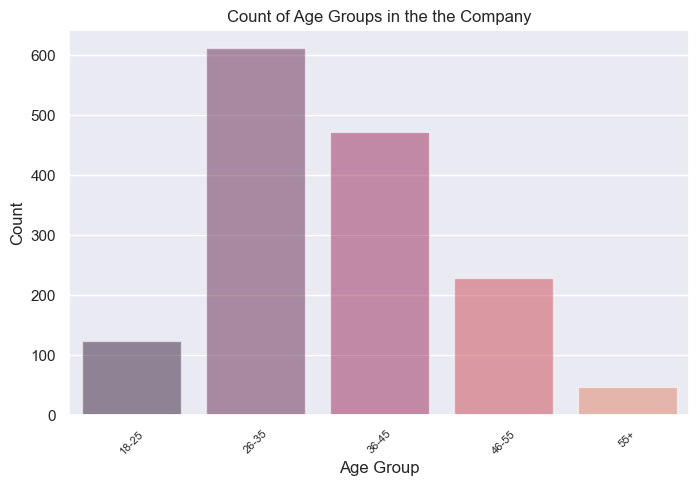

In [10]:
sns.set_palette("rocket")

plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = "AgeGroup", hue = "AgeGroup", alpha = 0.5)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Count of Age Groups in the the Company")
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

**As we can see that maximum number of people were in the Age Group of 26-35 years in the company and then 36-45 years**

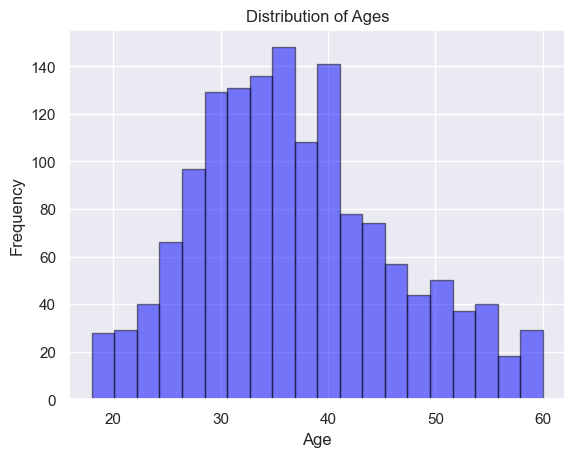

In [11]:
ages = df['Age']

# Create a histogram
plt.hist(ages, bins=20, color='blue', edgecolor='black', alpha = 0.5)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

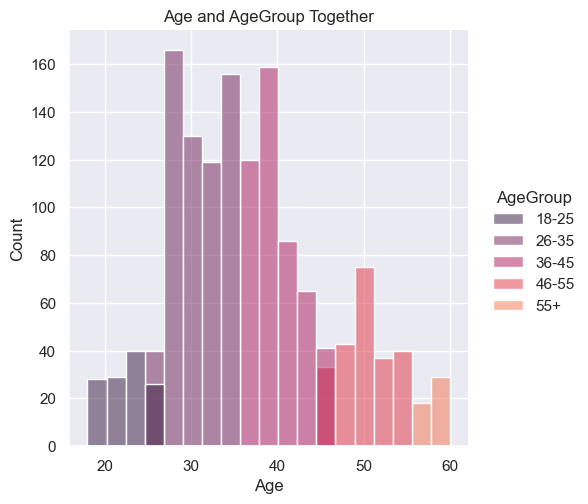

In [12]:
sns.displot(df,x="Age",hue="AgeGroup")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age and AgeGroup Together')
plt.show()

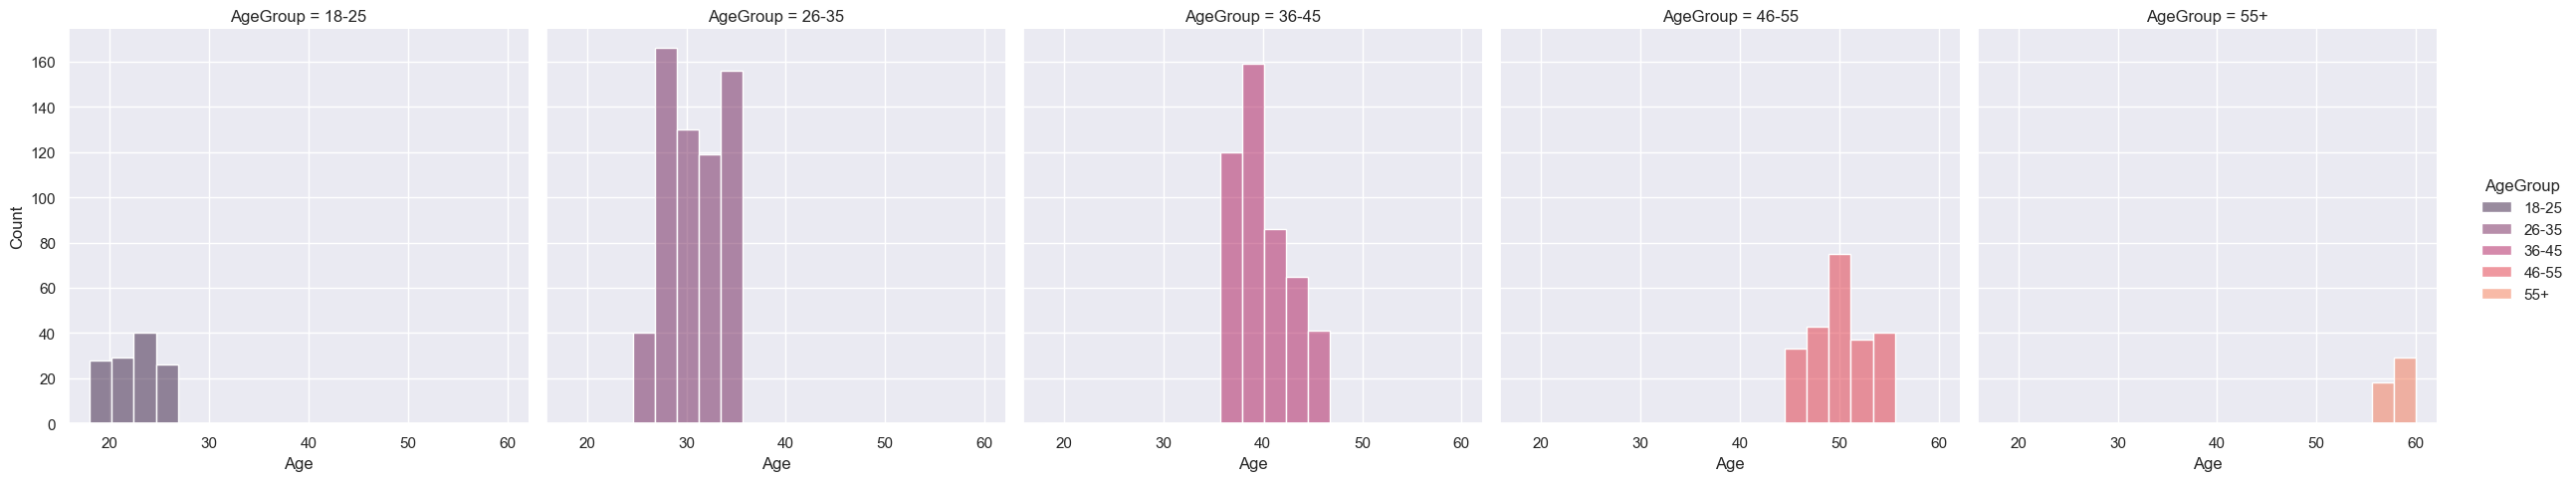

In [13]:
sns.displot(df,x="Age",col="AgeGroup", hue = "AgeGroup")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<h3>Count of Male and Female</h3>

<Axes: xlabel='Gender', ylabel='count'>

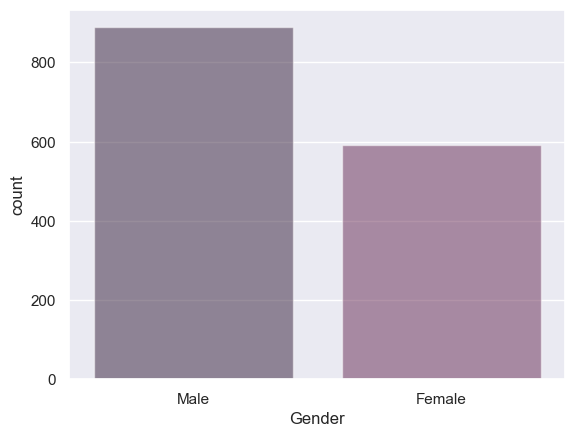

In [14]:
sns.countplot(data = df, x = "Gender", hue= "Gender", alpha = 0.5)

<h3>Overall Average Monthly Rate by Age Groups</h3>

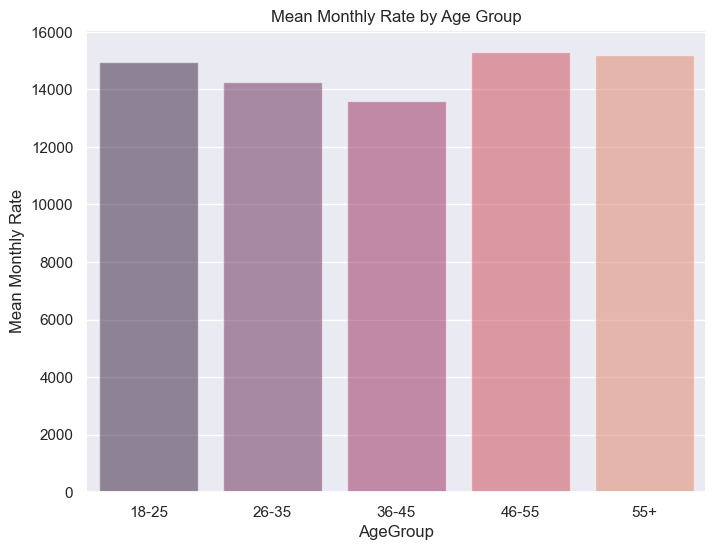

In [15]:
groupby_age = df.groupby('AgeGroup')['MonthlyRate'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='MonthlyRate', data=groupby_age, hue = "AgeGroup", alpha = 0.5)
plt.title('Mean Monthly Rate by Age Group')
plt.xlabel('AgeGroup')
plt.ylabel('Mean Monthly Rate')
plt.show()

<h3>Overall Average Monthly Income by Age Groups</h3>

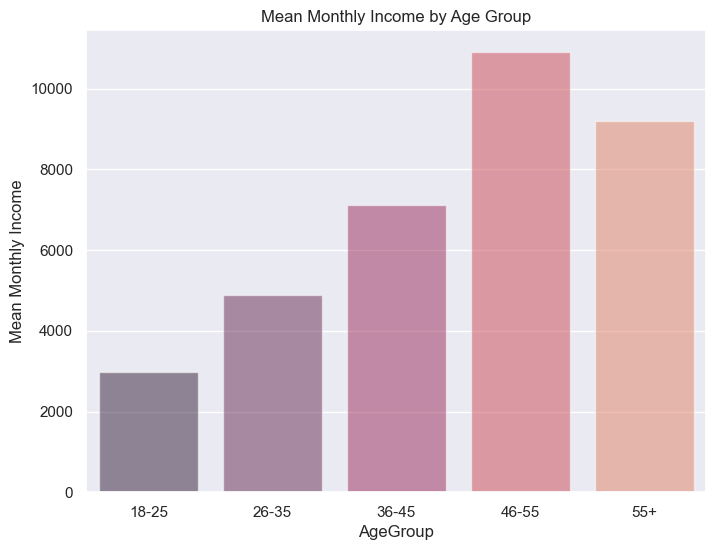

In [16]:
groupby_age2 = df.groupby('AgeGroup')['MonthlyIncome'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='MonthlyIncome', data=groupby_age2, hue = "AgeGroup", alpha = 0.5)
plt.title('Mean Monthly Income by Age Group')
plt.xlabel('AgeGroup')
plt.ylabel('Mean Monthly Income')
plt.show()

<h3>Some employee work and environment status</h3>

In [17]:
mean_Relationship_Satisfaction = df['RelationshipSatisfaction'].mean()

In [18]:
mean_performance_rating = df['PerformanceRating'].mean()

In [19]:
mean_Percent_Salary_Hike = df['PercentSalaryHike'].mean()

In [20]:
mean_Relationship_Satisfaction

2.7087837837837836

In [21]:
mean_performance_rating

3.1533783783783784

In [22]:
mean_Percent_Salary_Hike

15.210135135135134

<h3>Job Roles Of Different People</h3>

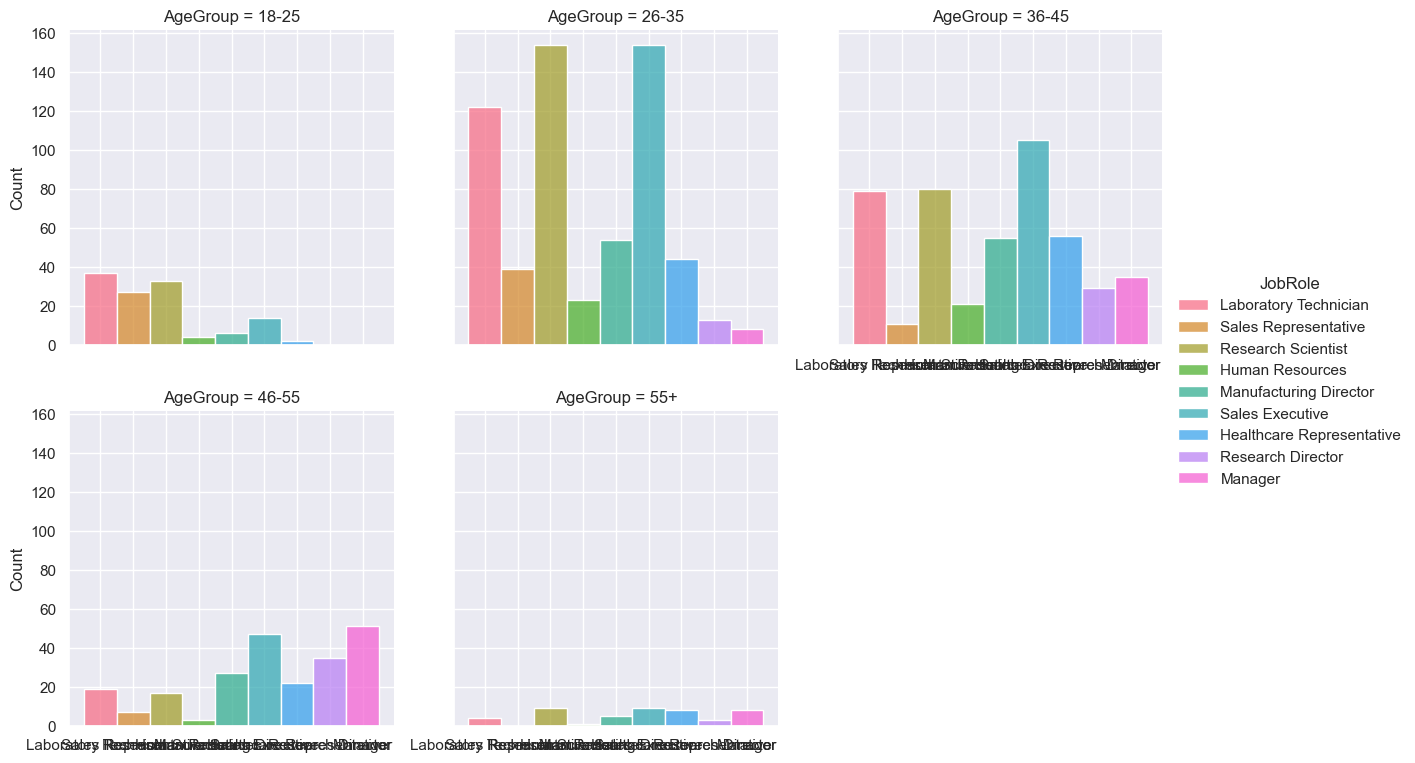

In [23]:
g = sns.FacetGrid(df, col="AgeGroup", hue="JobRole", col_wrap=3, height=4)

# Map the displot onto the FacetGrid
g.map(sns.histplot, 'JobRole')

# Add legend
g.add_legend()

# Remove x-axis labels
for ax in g.axes.flat:
    ax.set(xlabel='')

<h2 style="color: red;">Analysis without ATTRITION status</h2>

<h3>BusinessTravel Status</h3>

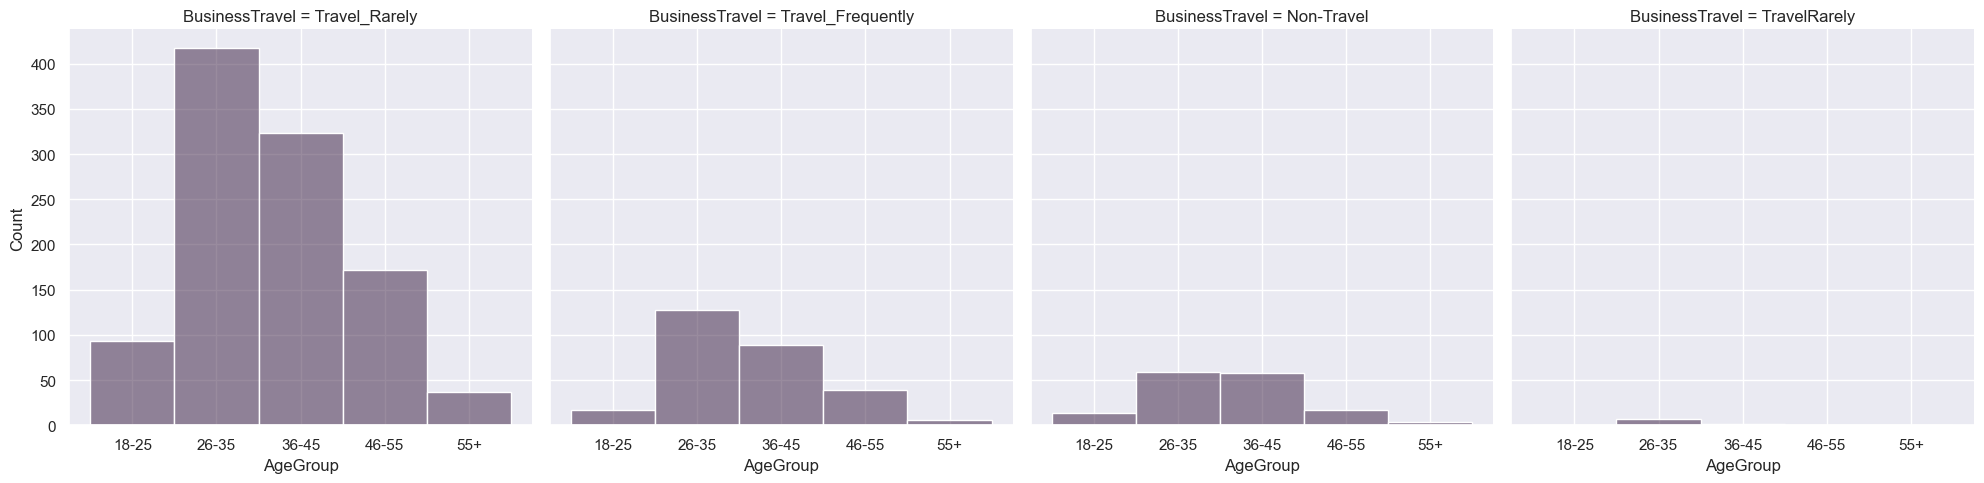

In [24]:
sns.displot(df,x="AgeGroup",col="BusinessTravel", alpha = 0.5)
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()

<h3>Department Status</h3>

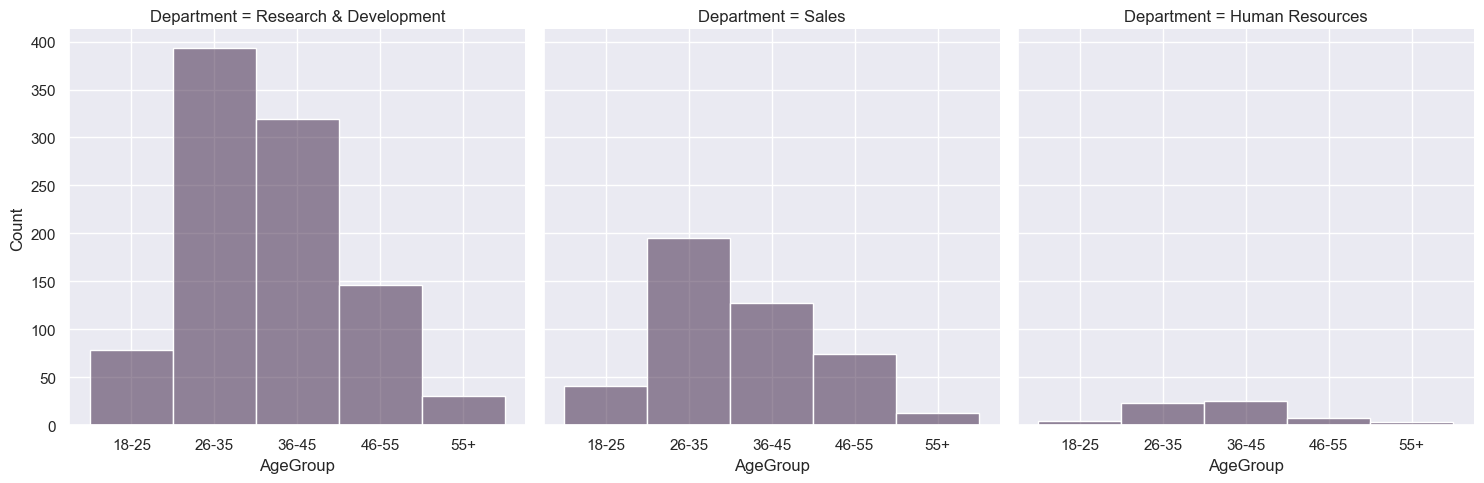

In [25]:
sns.displot(df,x="AgeGroup",col="Department", alpha = 0.5)
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()

<h3>Education Field Status</h3>

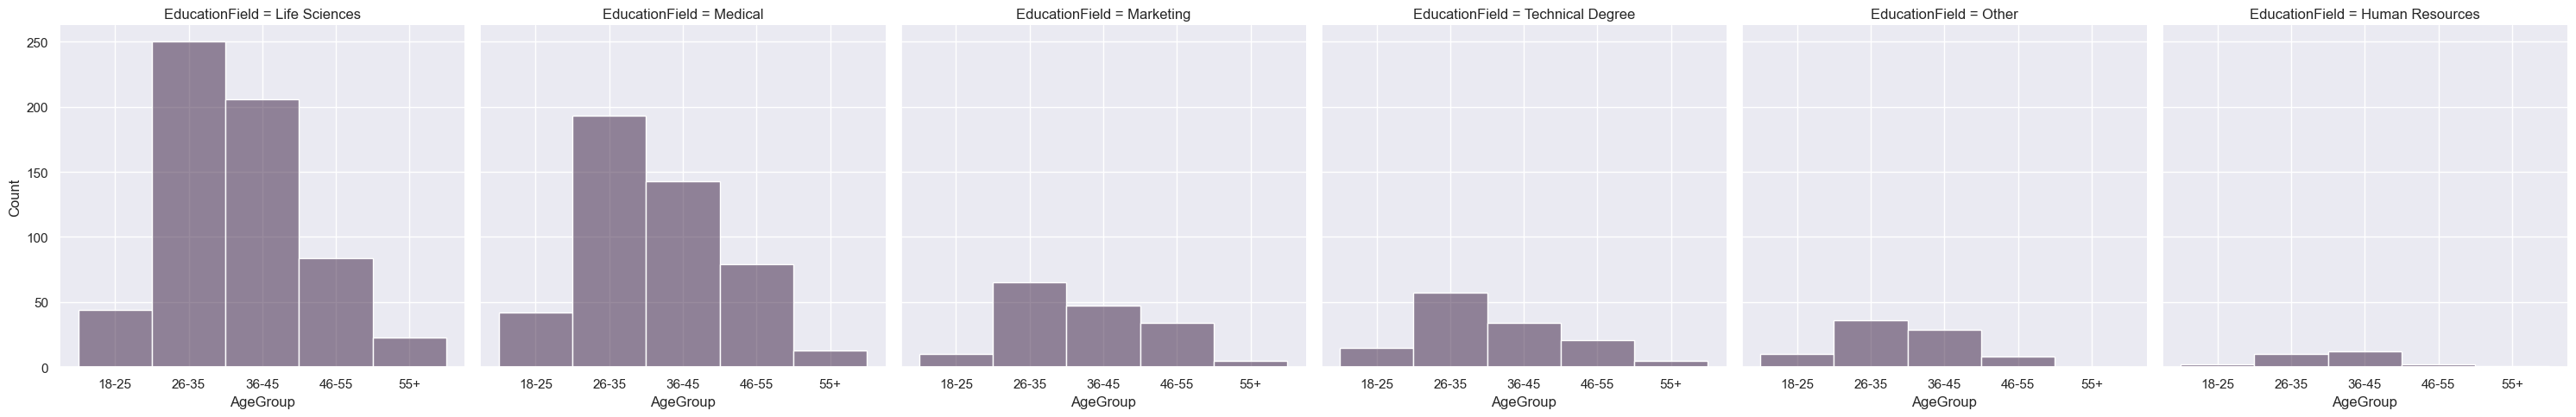

In [26]:
sns.displot(df,x="AgeGroup",col="EducationField", alpha = 0.5)

<h3>Maritial Status</h3>

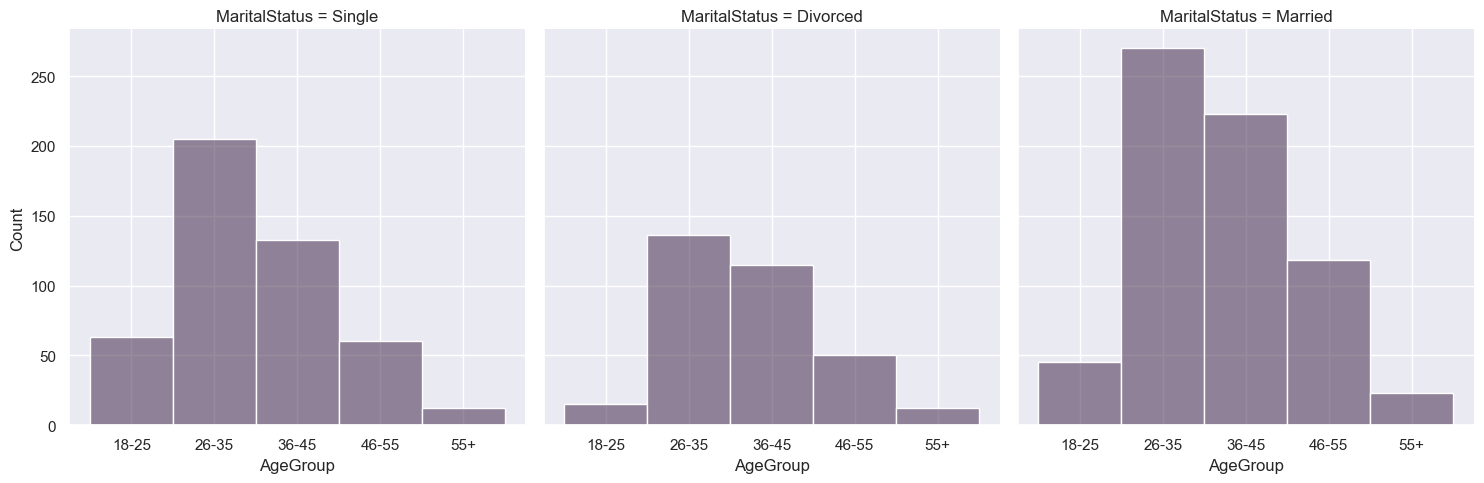

In [27]:
sns.displot(df, x="AgeGroup", col="MaritalStatus", alpha = 0.5)

<h2 style="color: red;">Analysis with ATTRITION status</h2>

<h3>Count of attrition</h3>

Text(0, 0.5, 'Count')

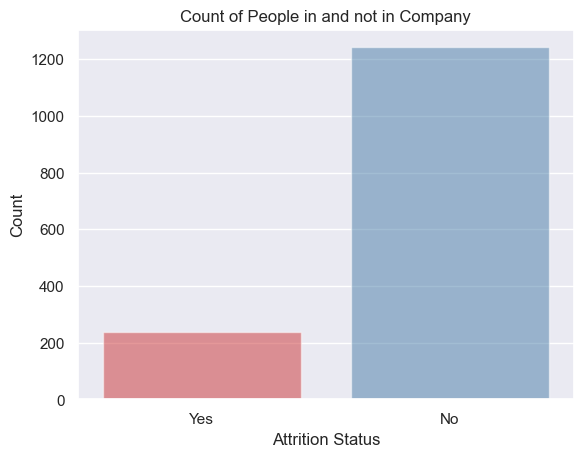

In [28]:
sns.set_palette("Set1")

sns.countplot(data = df, x = "Attrition", hue = "Attrition", alpha = 0.5)
plt.title('Count of People in and not in Company')
plt.xlabel('Attrition Status')
plt.ylabel('Count')

<h3>Male and Female Attrition</h3>

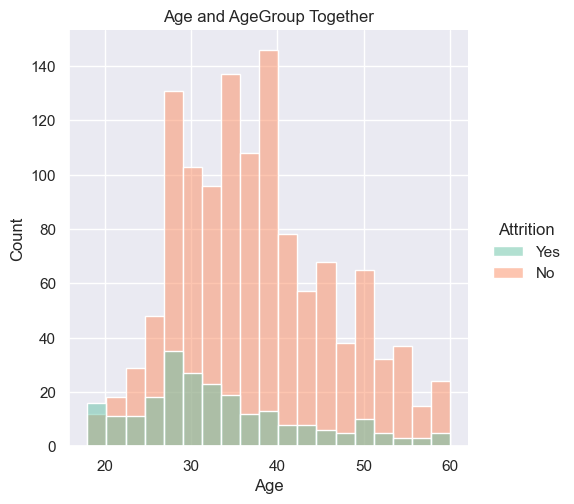

In [29]:
sns.set_palette("Set2")

sns.displot(df,x="Age",hue="Attrition")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age and AgeGroup Together')
plt.show()

<h3>Age and Attrition Count</h3>

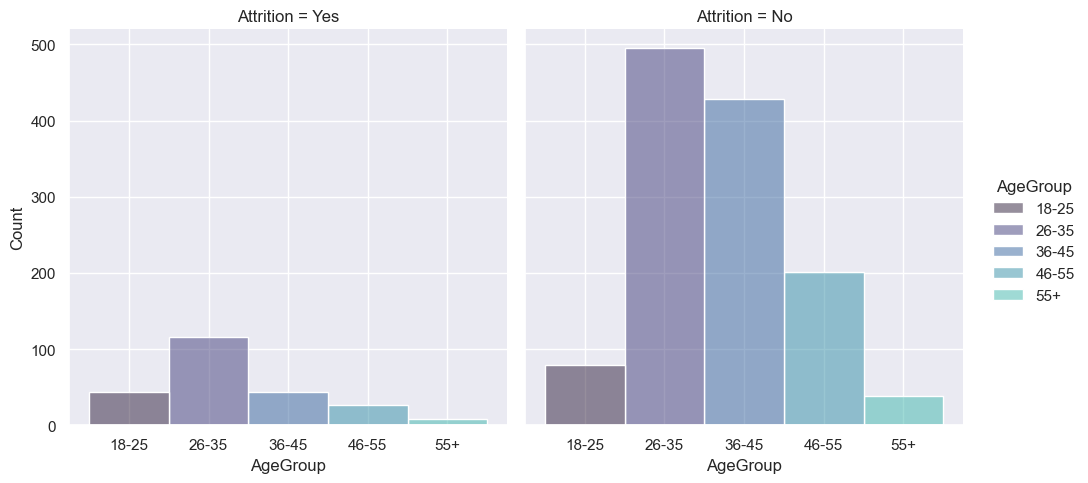

In [30]:
sns.set_palette("mako")

sns.displot(df,x="AgeGroup",col="Attrition", hue = "AgeGroup")
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()

<h3>Business Travel Status</h3>

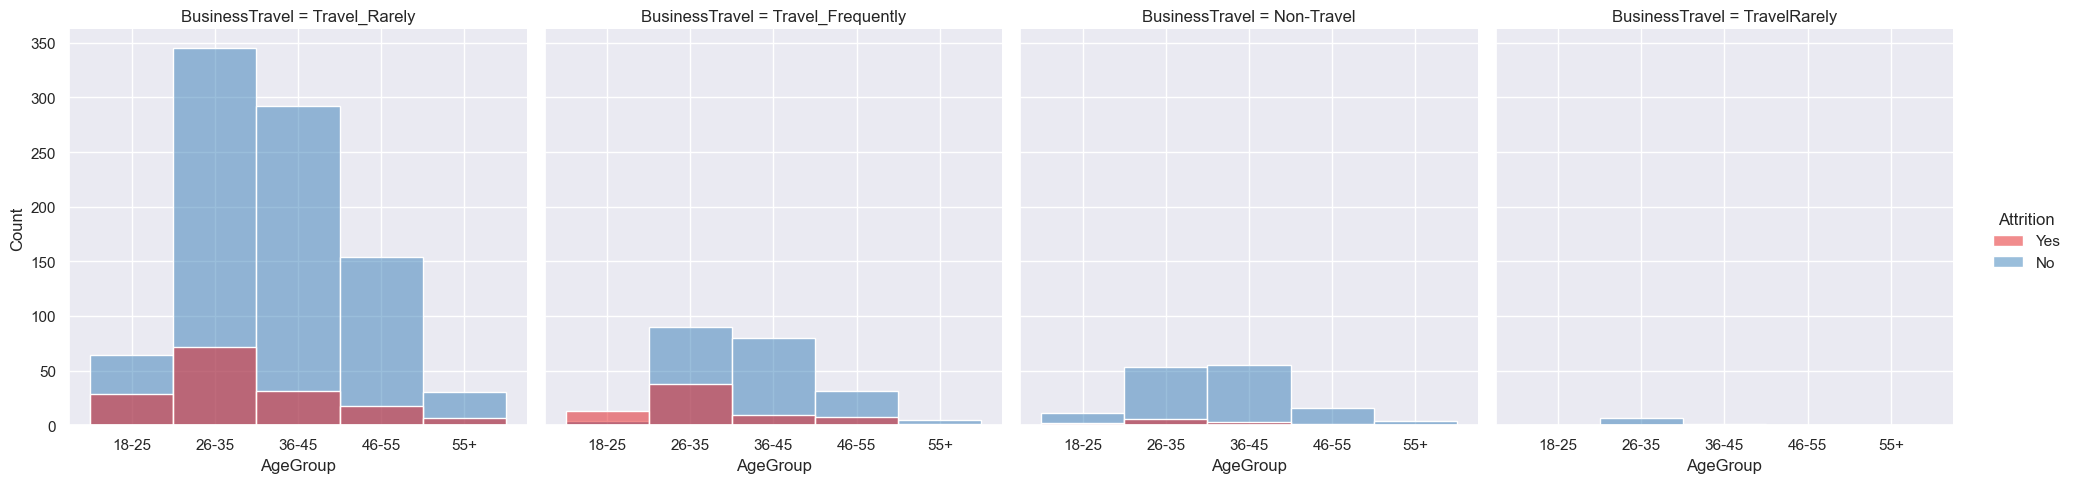

In [31]:
sns.set_palette("Set1")
sns.displot(df,x="AgeGroup",col="BusinessTravel", hue = "Attrition")
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()

<h3>Department Status</h3>

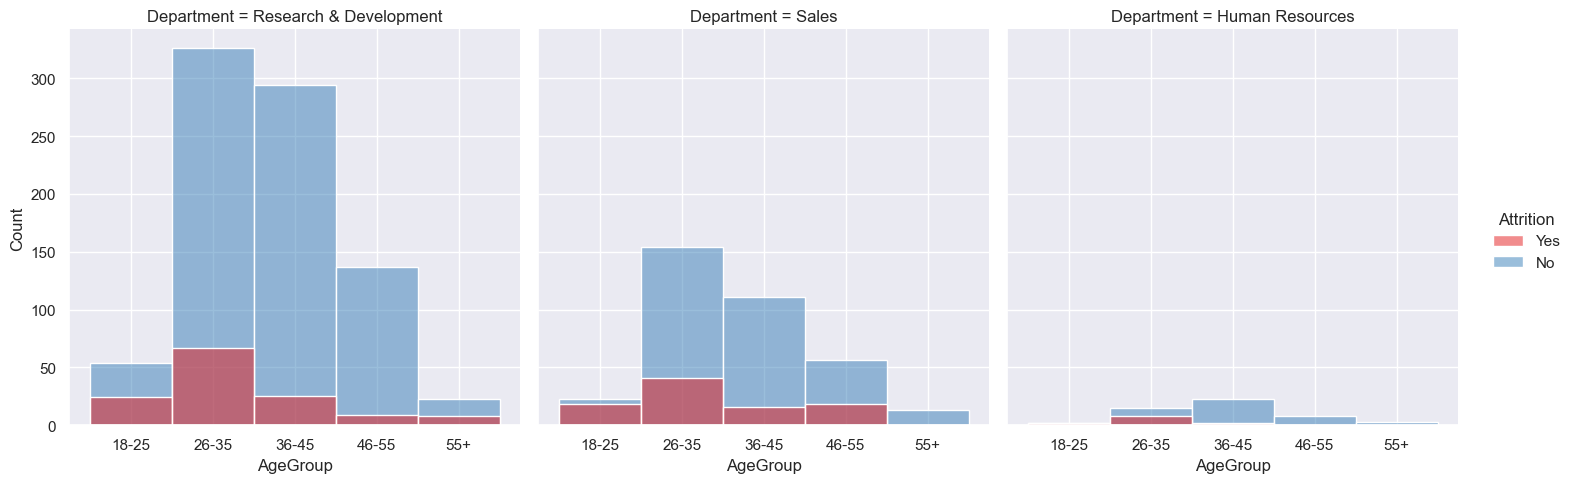

In [32]:
sns.set_palette("Set1")
sns.displot(df,x="AgeGroup",col="Department",hue = "Attrition")
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()

<h3>Educational Field</h3>

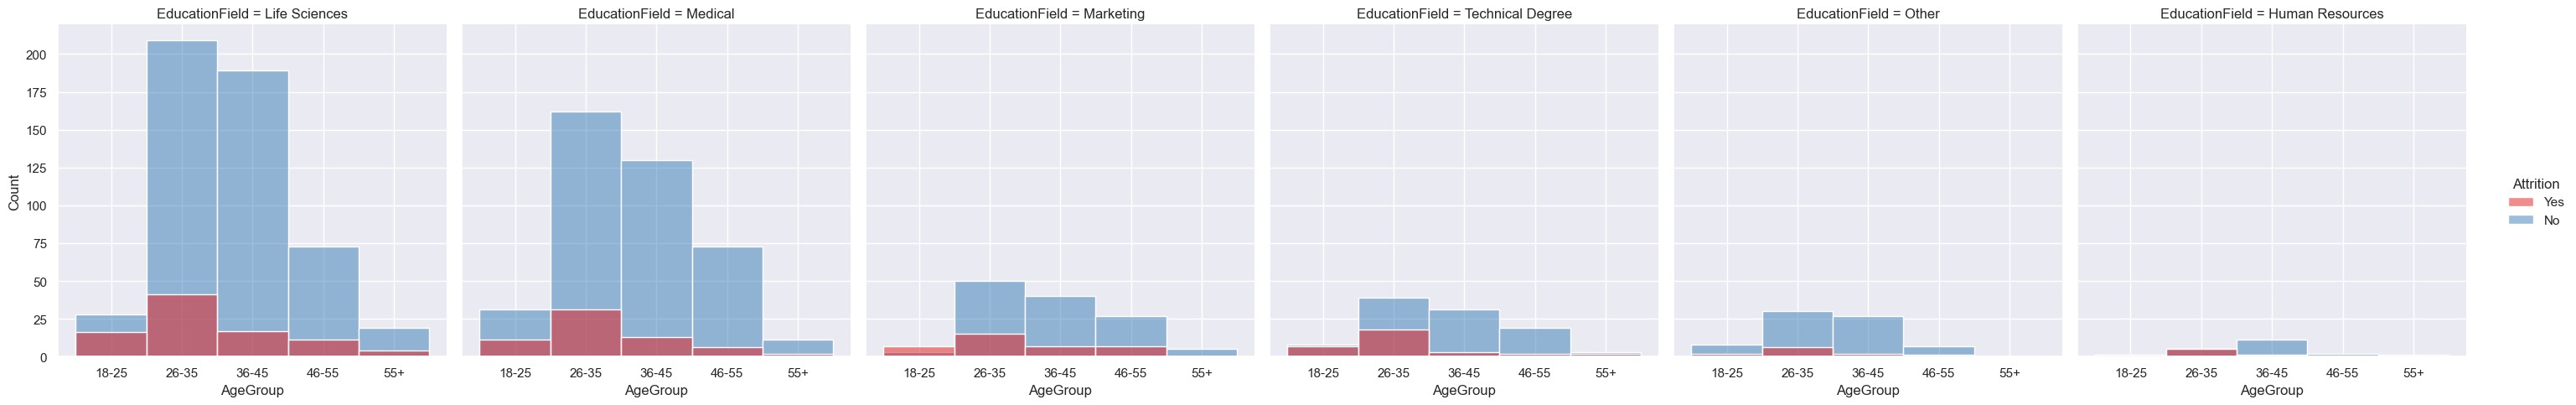

In [33]:
sns.set_palette("Set1")
sns.displot(df,x="AgeGroup",col="EducationField",hue="Attrition")

<h2>Maritial Status</h2>

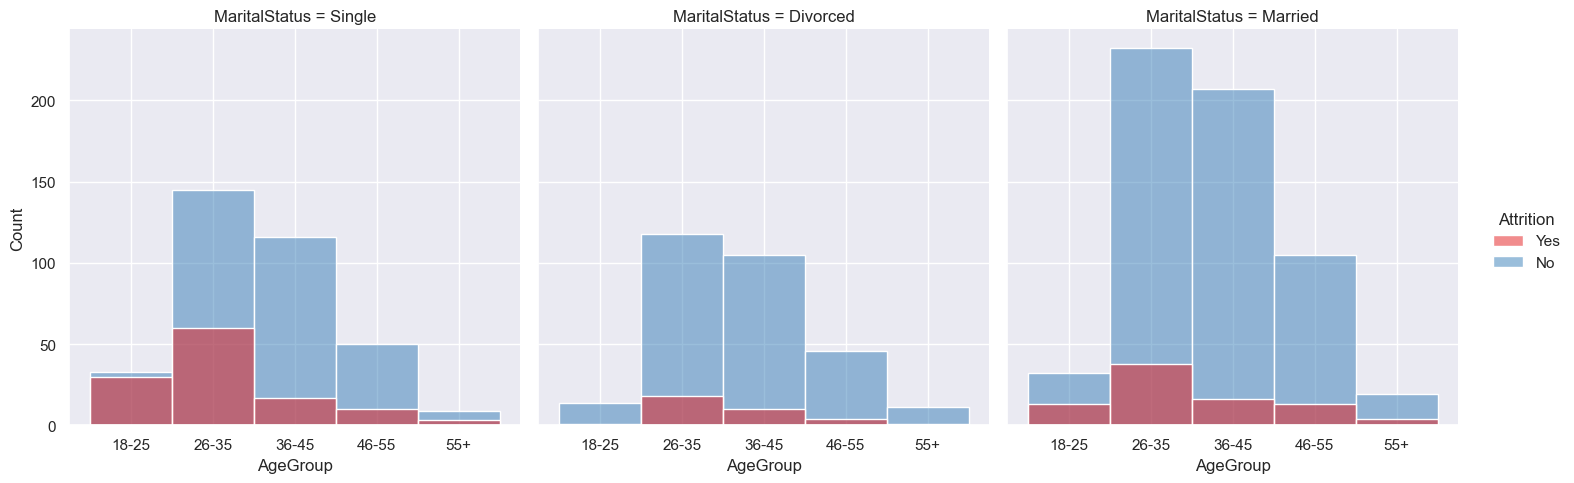

In [34]:
sns.set_palette("Set1")
sns.displot(df, x="AgeGroup", col="MaritalStatus", hue = "Attrition")

**There are some other important factors in the company for example the working environment, the nature of the fellow members and the higher ups. Sometimes people are not happy by their job, maybe they are just doing it for the purpose of just doing it.And these are many other reasons, in this section we will look at some of the other important factors which affects the attrition status**

<h2 style="color: red;">Separately Analyzing the People who's Attrition Status was YES and NO</h2>

<h2>ATTRITION PEOPLE</h2>

In [35]:
df_atr = df[df['Attrition'] != 'No']

In [36]:
df_atr = df_atr.reset_index(drop=True)

In [37]:
df_atr.head(5)

,Age,AgeGroup,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,18,18-25,Yes,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,54,...,3,Single,1420,Upto 5k,25233,1,No,13,3,3
1,18,18-25,Yes,Travel_Frequently,Sales,5,Marketing,2,Male,69,...,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4
2,18,18-25,Yes,Non-Travel,Research & Development,8,Medical,3,Male,80,...,3,Single,1904,Upto 5k,13556,1,No,12,3,4
3,18,18-25,Yes,Travel_Frequently,Sales,3,Medical,2,Female,70,...,4,Single,1569,Upto 5k,18420,1,Yes,12,3,3
4,19,18-25,Yes,Travel_Rarely,Sales,22,Marketing,4,Male,50,...,3,Single,1675,Upto 5k,26820,1,Yes,19,3,4


<h3>Job Level and Job Role</h3>

<Axes: xlabel='JobLevel', ylabel='count'>

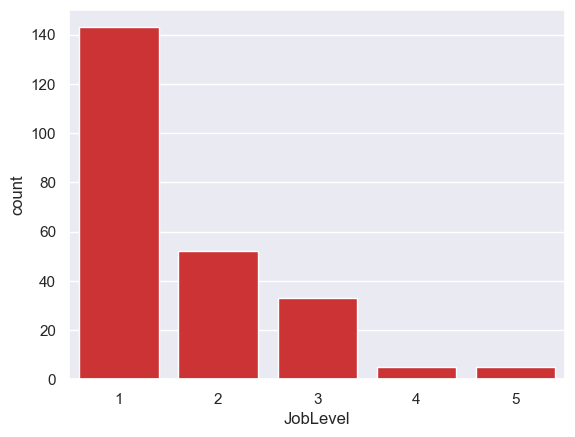

In [38]:
sns.set_palette("Set1")
sns.countplot(data = df_atr, x = "JobLevel")

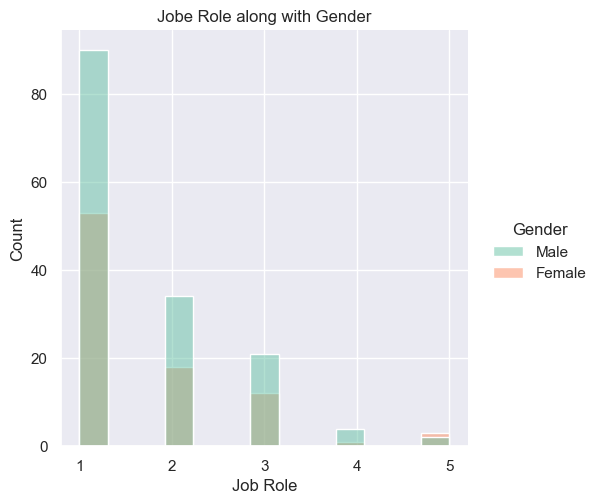

In [39]:
sns.set_palette("Set2")
sns.displot(df_atr,x="JobLevel",hue="Gender")
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Jobe Role along with Gender')
plt.show()

<h3>Overtime Status</h3>

<Axes: xlabel='OverTime', ylabel='count'>

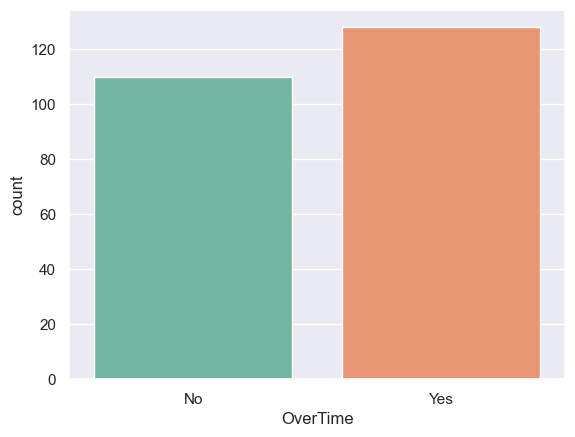

In [40]:
sns.countplot(data = df_atr, x = "OverTime", hue = "OverTime")

In [41]:
# Calculating the percentage of "YES" and "NO"
percentage_yes = (df_atr["OverTime"].value_counts(normalize=True) * 100).loc["Yes"]
percentage_no = (df_atr["OverTime"].value_counts(normalize=True) * 100).loc["No"]

# Displaying the percentages
print(f"Percentage of 'YES': {percentage_yes:.2f}%")
print(f"Percentage of 'NO': {percentage_no:.2f}%")

Percentage of 'YES': 53.78%
Percentage of 'NO': 46.22%


<h3>Distance from home</h3>

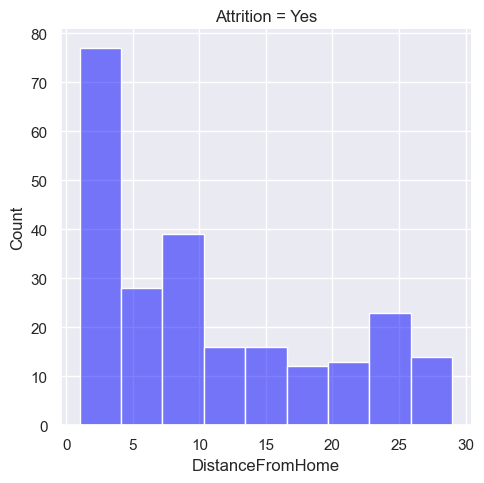

In [42]:
sns.displot(df_atr,x="DistanceFromHome",col="Attrition", color = "blue", alpha = 0.5)

<h3>Salary Slab</h3>

<Axes: xlabel='SalarySlab', ylabel='count'>

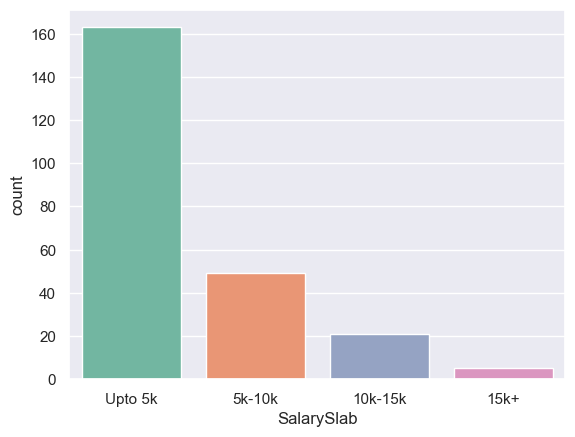

In [43]:
sns.countplot(data = df_atr, x = "SalarySlab", hue = "SalarySlab")

<h3>Year in Comanies Worked</h3>

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

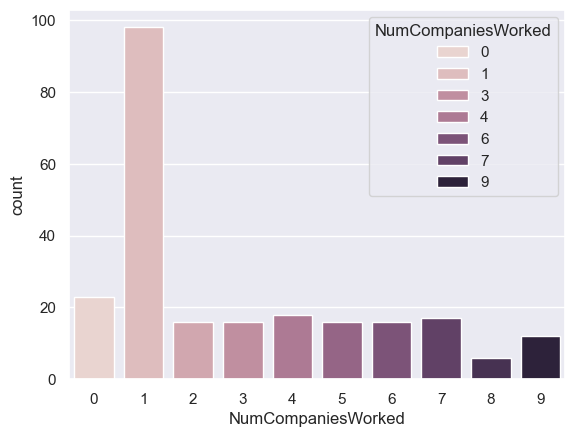

In [44]:
sns.countplot(data = df_atr, x = "NumCompaniesWorked", hue = "NumCompaniesWorked")

<h3>Mean percentage hike</h3>

In [45]:
mean_Percent_Salary_Hike_atr = df_atr['PercentSalaryHike'].mean()

In [46]:
mean_Percent_Salary_Hike_atr

15.088235294117647

<h3>Relationship Satisfaction</h3>

In [47]:
mean_Relationship_Satisfaction_atr = df_atr['RelationshipSatisfaction'].mean()

In [48]:
mean_Relationship_Satisfaction_atr

2.596638655462185

<h3>Job Satisfaction</h3>

In [49]:
mean_job_satisfaction_atr = df_atr['JobSatisfaction'].mean()

In [50]:
mean_job_satisfaction_atr

2.46218487394958

<H2>NON-ATTRITION PEOPLE</H2>

In [51]:
df_n_atr = df[df['Attrition'] != 'Yes']

In [52]:
df_n_atr = df_n_atr.reset_index(drop=True)

In [53]:
df_n_atr.head(5)

,Age,AgeGroup,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,18,18-25,No,Travel_Rarely,Sales,10,Medical,4,Female,69,...,3,Single,1200,Upto 5k,9724,1,No,12,3,1
1,18,18-25,No,Non-Travel,Research & Development,5,Life Sciences,2,Male,73,...,4,Single,1051,Upto 5k,13493,1,No,15,3,4
2,18,18-25,No,Non-Travel,Research & Development,1,Life Sciences,4,Female,97,...,4,Single,1611,Upto 5k,19305,1,No,15,3,3
3,18,18-25,No,Non-Travel,Research & Development,14,Medical,2,Female,33,...,3,Single,1514,Upto 5k,8018,1,No,16,3,3
4,19,18-25,No,Travel_Rarely,Research & Development,3,Medical,2,Female,79,...,2,Single,1483,Upto 5k,16102,1,No,14,3,4


<h3>Job Level and Job Role</h3>

<Axes: xlabel='JobLevel', ylabel='count'>

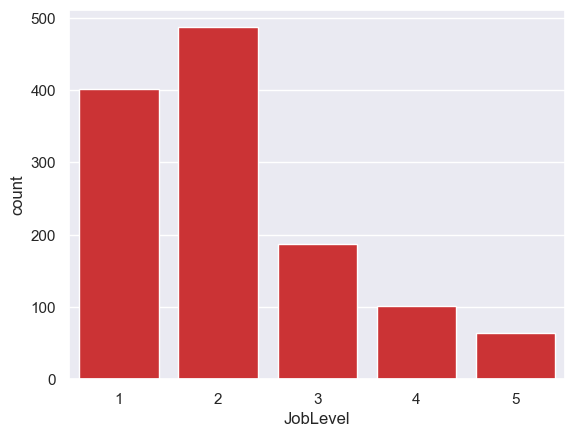

In [54]:
sns.set_palette("Set1")
sns.countplot(data = df_n_atr, x = "JobLevel")

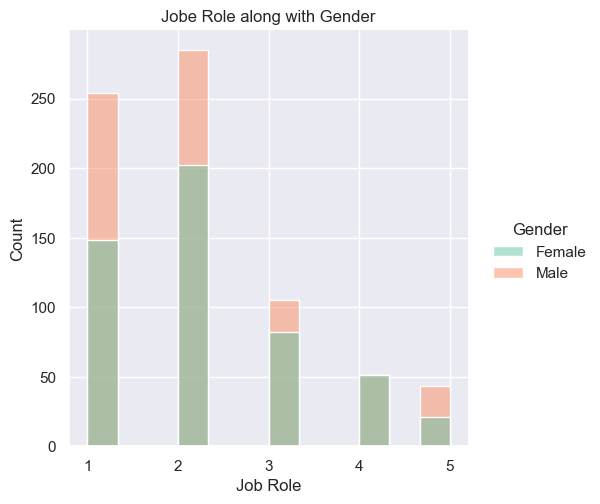

In [55]:
sns.set_palette("Set2")
sns.displot(df_n_atr,x="JobLevel",hue="Gender")
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Jobe Role along with Gender')
plt.show()

<h3>Overtime Status</h3>

<Axes: xlabel='OverTime', ylabel='count'>

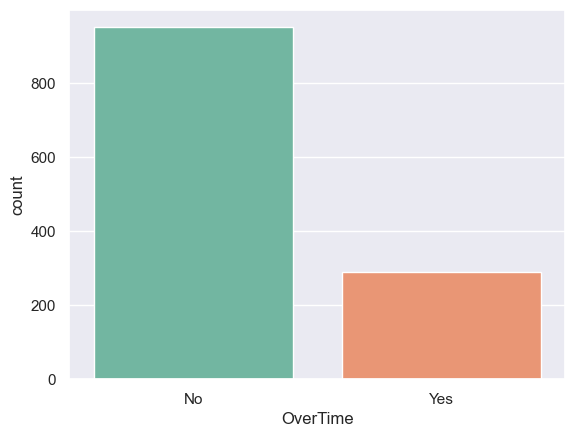

In [56]:
sns.countplot(data = df_n_atr, x = "OverTime", hue = "OverTime")

In [57]:
# Calculating the percentage of "YES" and "NO"
percentage_yes = (df_n_atr["OverTime"].value_counts(normalize=True) * 100).loc["Yes"]
percentage_no = (df_n_atr["OverTime"].value_counts(normalize=True) * 100).loc["No"]

# Displaying the percentages
print(f"Percentage of 'YES': {percentage_yes:.2f}%")
print(f"Percentage of 'NO': {percentage_no:.2f}%")

Percentage of 'YES': 23.35%
Percentage of 'NO': 76.65%


<h3>Distance from Home</h3>

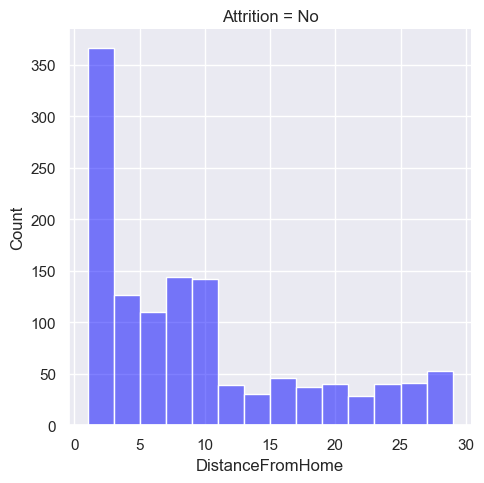

In [58]:
sns.displot(df_n_atr,x="DistanceFromHome",col="Attrition", color = "blue", alpha = 0.5)

<h3>Salary Slab</h3>

<Axes: xlabel='SalarySlab', ylabel='count'>

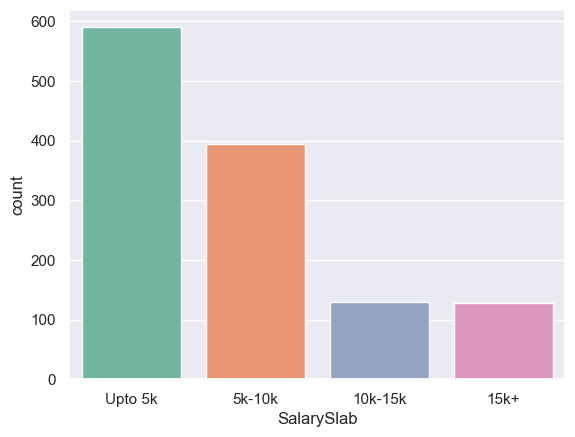

In [59]:
sns.countplot(data = df_n_atr, x = "SalarySlab", hue = "SalarySlab")

<h3>Years in Comanies Worked</h3>

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

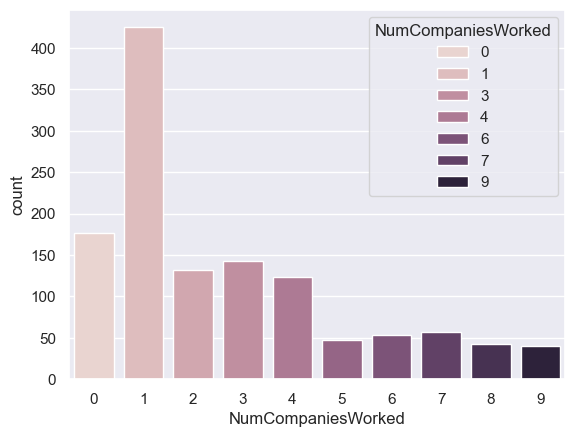

In [60]:
sns.countplot(data = df_n_atr, x = "NumCompaniesWorked", hue = "NumCompaniesWorked")

<h3>Mean Percentage Hike</h3>

In [61]:
mean_Percent_Salary_Hike_n_atr = df_n_atr['PercentSalaryHike'].mean()

In [62]:
mean_Percent_Salary_Hike_n_atr

15.233494363929147

<h3>Relationship Satisfaction</h3>

In [63]:
mean_Relationship_Satisfaction_n_atr = df_n_atr['RelationshipSatisfaction'].mean()

In [64]:
mean_Relationship_Satisfaction_n_atr

2.7302737520128826

<h3>Job Satisfaction</h3>

In [65]:
mean_job_satisfaction_n_atr = df_n_atr['JobSatisfaction'].mean()

In [66]:
mean_job_satisfaction_n_atr

2.7753623188405796

<h2 style="color: orange; font-family: Helvetica; font-weight: bold;">ML MODEL DEVELOPMENT</h2>

**Now this is a classic problem of Classfications where we have to identify the category of new observatins based on our training data.This problem statment is an example of Churn modelling where we have to predict whether the employee will leave the company or not after some certain parameters**

<h2>Data Preprocessing</h2>

In [67]:
dataset = pd.read_csv("D:\\My_Study\\Data Analytics\\Excel Data Sets\\DataSets 2\\ATTRITION.csv")

In [68]:
# removing the unwanted columns
drop_col = ["EmpID", "SalarySlab", "Education", "EmployeeCount", "EmployeeNumber", "Over18", "AgeGroup", "OverTime"]
dataset = dataset.drop(columns=drop_col, axis=1)

**We will apply the one hot encoding and the Label Encoding to the columns. After that we will be doing the feature scaling. To just keep the things standard we will keep the Object quantities first, which will be One Hot Encoded and the numeric columns later so that indexing during the feature scaling is Easy**

In [69]:
# Get the column names with objects
object_columns = dataset.select_dtypes(include='object').columns.tolist()

# Get the column names with integers
int_columns = dataset.select_dtypes(include='int').columns.tolist()

# Reorder the columns
new_order = object_columns + int_columns
dataset = dataset[new_order]

In [70]:
dataset.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Age,DailyRate,DistanceFromHome,...,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,18,230,3,...,54,3,1,3,1420,25233,1,13,3,3
1,No,Travel_Rarely,Sales,Medical,Female,Sales Representative,Single,18,812,10,...,69,2,1,3,1200,9724,1,12,3,1
2,Yes,Travel_Frequently,Sales,Marketing,Male,Sales Representative,Single,18,1306,5,...,69,3,1,2,1878,8059,1,14,3,4
3,No,Non-Travel,Research & Development,Life Sciences,Male,Research Scientist,Single,18,287,5,...,73,3,1,4,1051,13493,1,15,3,4
4,Yes,Non-Travel,Research & Development,Medical,Male,Laboratory Technician,Single,18,247,8,...,80,3,1,3,1904,13556,1,12,3,4


In [71]:
X = dataset.drop(columns=["Attrition"])
Y = dataset["Attrition"]

In [72]:
X.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,18,230,3,3,54,3,1,3,1420,25233,1,13,3,3
1,Travel_Rarely,Sales,Medical,Female,Sales Representative,Single,18,812,10,4,69,2,1,3,1200,9724,1,12,3,1
2,Travel_Frequently,Sales,Marketing,Male,Sales Representative,Single,18,1306,5,2,69,3,1,2,1878,8059,1,14,3,4
3,Non-Travel,Research & Development,Life Sciences,Male,Research Scientist,Single,18,287,5,2,73,3,1,4,1051,13493,1,15,3,4
4,Non-Travel,Research & Development,Medical,Male,Laboratory Technician,Single,18,247,8,3,80,3,1,3,1904,13556,1,12,3,4


In [73]:
Y

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
1475     No
1476     No
1477     No
1478     No
1479     No
Name: Attrition, Length: 1480, dtype: object

ONE HOT ENCODED THE INDEPENDENT VARIABLES

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = [0,1,2,3,4,5]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

LABEL ENCODING THE DEPENDENT VARIABLE

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

<h3>Splitting into Train and Test</h3>

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 69)

In [77]:
X_train

array([[ 0.,  0.,  1., ..., 12.,  3.,  3.],
       [ 0.,  0.,  0., ..., 19.,  3.,  3.],
       [ 0.,  0.,  0., ..., 18.,  3.,  2.],
       ...,
       [ 0.,  0.,  0., ..., 12.,  3.,  4.],
       [ 0.,  0.,  0., ..., 11.,  3.,  1.],
       [ 0.,  0.,  0., ..., 19.,  3.,  1.]])

In [78]:
X_test

array([[ 0.,  0.,  0., ..., 13.,  3.,  3.],
       [ 0.,  0.,  0., ..., 12.,  3.,  4.],
       [ 0.,  0.,  0., ..., 13.,  3.,  2.],
       ...,
       [ 0.,  0.,  1., ..., 17.,  3.,  3.],
       [ 0.,  0.,  0., ..., 19.,  3.,  3.],
       [ 0.,  0.,  1., ..., 11.,  3.,  2.]])

In [79]:
Y_train

array([0, 0, 0, ..., 0, 1, 0])

In [80]:
Y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

<h3>Feature Scaling</h3>

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[: , 6:] = sc.fit_transform(X_train[: , 6:])
X_test[: , 6:] = sc.fit_transform(X_test[: , 6:])

<h3>Training the model on the train set</h3>

In [82]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<h3>Predicting the test set results</h3>

In [83]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]

<h3>Making the Confusion Matrix</h3>

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[209  40]
 [ 36  11]]


0.7432432432432432

<h3>Grid Search</h3>

**For improving the accuracy we can apply GRID SEARCH method for the best parameters**

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth" :[3,4,5,6,7,8,9], "max_leaf_nodes":[2,3,4,5,6,7,8]}
classifier2 = DecisionTreeClassifier()
classifier2 = GridSearchCV(classifier2, parameters)

In [86]:
classifier2.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8]})

In [87]:
print("Training data score: " + str(classifier2.score(X_train,Y_train)))
print("Testing data score: " + str(classifier2.score(X_test,Y_test)))

Training data score: 0.8386824324324325
Testing data score: 0.8412162162162162


**Best Parameters**

In [88]:
# best parameters
classifier2.best_params_

{'max_depth': 3, 'max_leaf_nodes': 2}

<h3>Confusion Matric for classifier2</h3>

In [89]:
from sklearn.metrics import confusion_matrix
Y_pred = classifier2.predict(X_test)
cm2 = confusion_matrix(Y_test,Y_pred)
cm2

array([[249,   0],
       [ 47,   0]], dtype=int64)

In [90]:
accuracy_score(Y_test, Y_pred)

0.8412162162162162

**As we can see with the help of Grid Search method we have increased out model accuracy from 74.3% to 84.1%**